# Abalone Age Regression

The Abalone dataset comes from a 1994 study, "The Population Biology of Abalone", focusing on Tasmania's North Coast and Islands of the Bass Straits. Abalone are marine snails, the flesh of which is considered a desirable food, and the shells of which are highly iridescent, which people have attractive as decorative objects and jewelry.

The age of Abalone is determined by cutting the shell through the core, staining it, and counting the number of rings (plus a constant of 1.5). The objective of this case study is to use the known data to predict age based on other features, as this is far less time-consuming than counting the rings. We will explore regression based methods of prediction.

The data includes sex, categorized as male, female, and infant. Also included are 3 measures of size (length, width, diameter) and 4 measures of weight (whole, shucked, viscera, and shell weight).

<img src="abalone.jpeg" style="height: 500px; width:auto;"></br></br>

# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("abalone.csv")

# Inspect Data

In [3]:
df.shape

(4177, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diam            4177 non-null   float64
 3   height          4177 non-null   float64
 4   weight          4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   age             4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.head()

,sex,length,diam,height,weight,shucked_weight,viscera_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Visualization

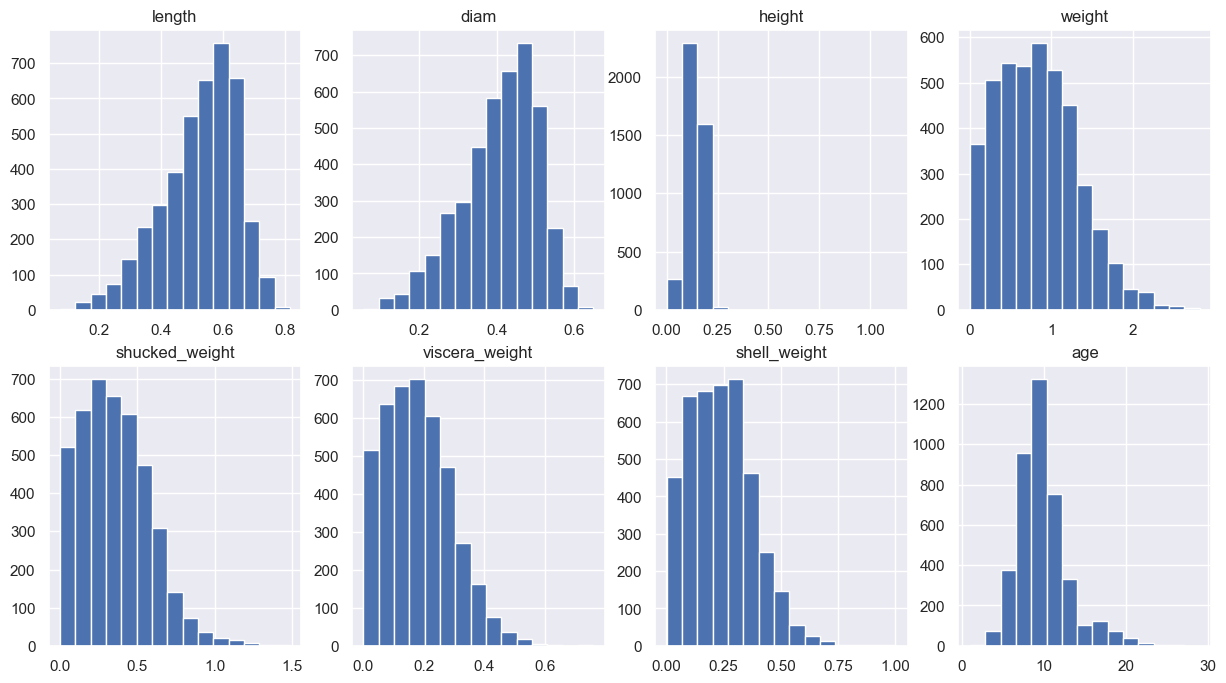

In [6]:
# histograms

fig, ax = plt.subplots(2, 4, figsize = (15, 8))

k = 15

ax[0][0].hist(df["length"], bins=k)
ax[0][0].set_title("length")

ax[0][1].hist(df["diam"], bins = k)
ax[0][1].set_title("diam")

ax[0][2].hist(df["height"], bins = k)
ax[0][2].set_title("height")

ax[0][3].hist(df["weight"], bins = k)
ax[0][3].set_title('weight')

ax[1][0].hist(df["shucked_weight"], bins=k)
ax[1][0].set_title("shucked_weight")

ax[1][1].hist(df["viscera_weight"], bins = k)
ax[1][1].set_title("viscera_weight")

ax[1][2].hist(df["shell_weight"], bins = k)
ax[1][2].set_title("shell_weight")

ax[1][3].hist(df["age"], bins = k)
ax[1][3].set_title('age')

plt.show()

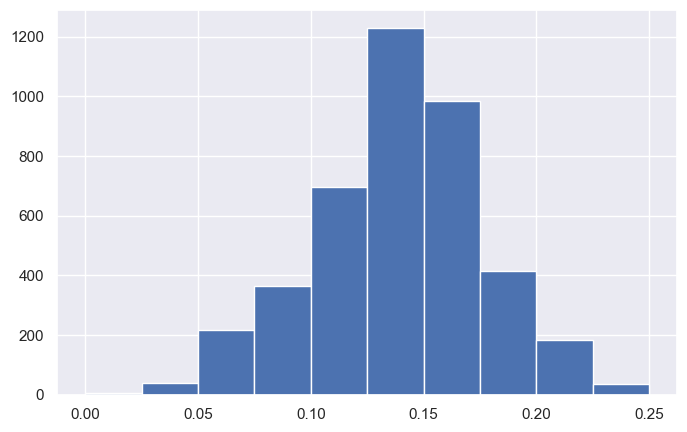

In [7]:
df = df[df['height'] < 0.5]
df['height'].hist(figsize=(8,5));

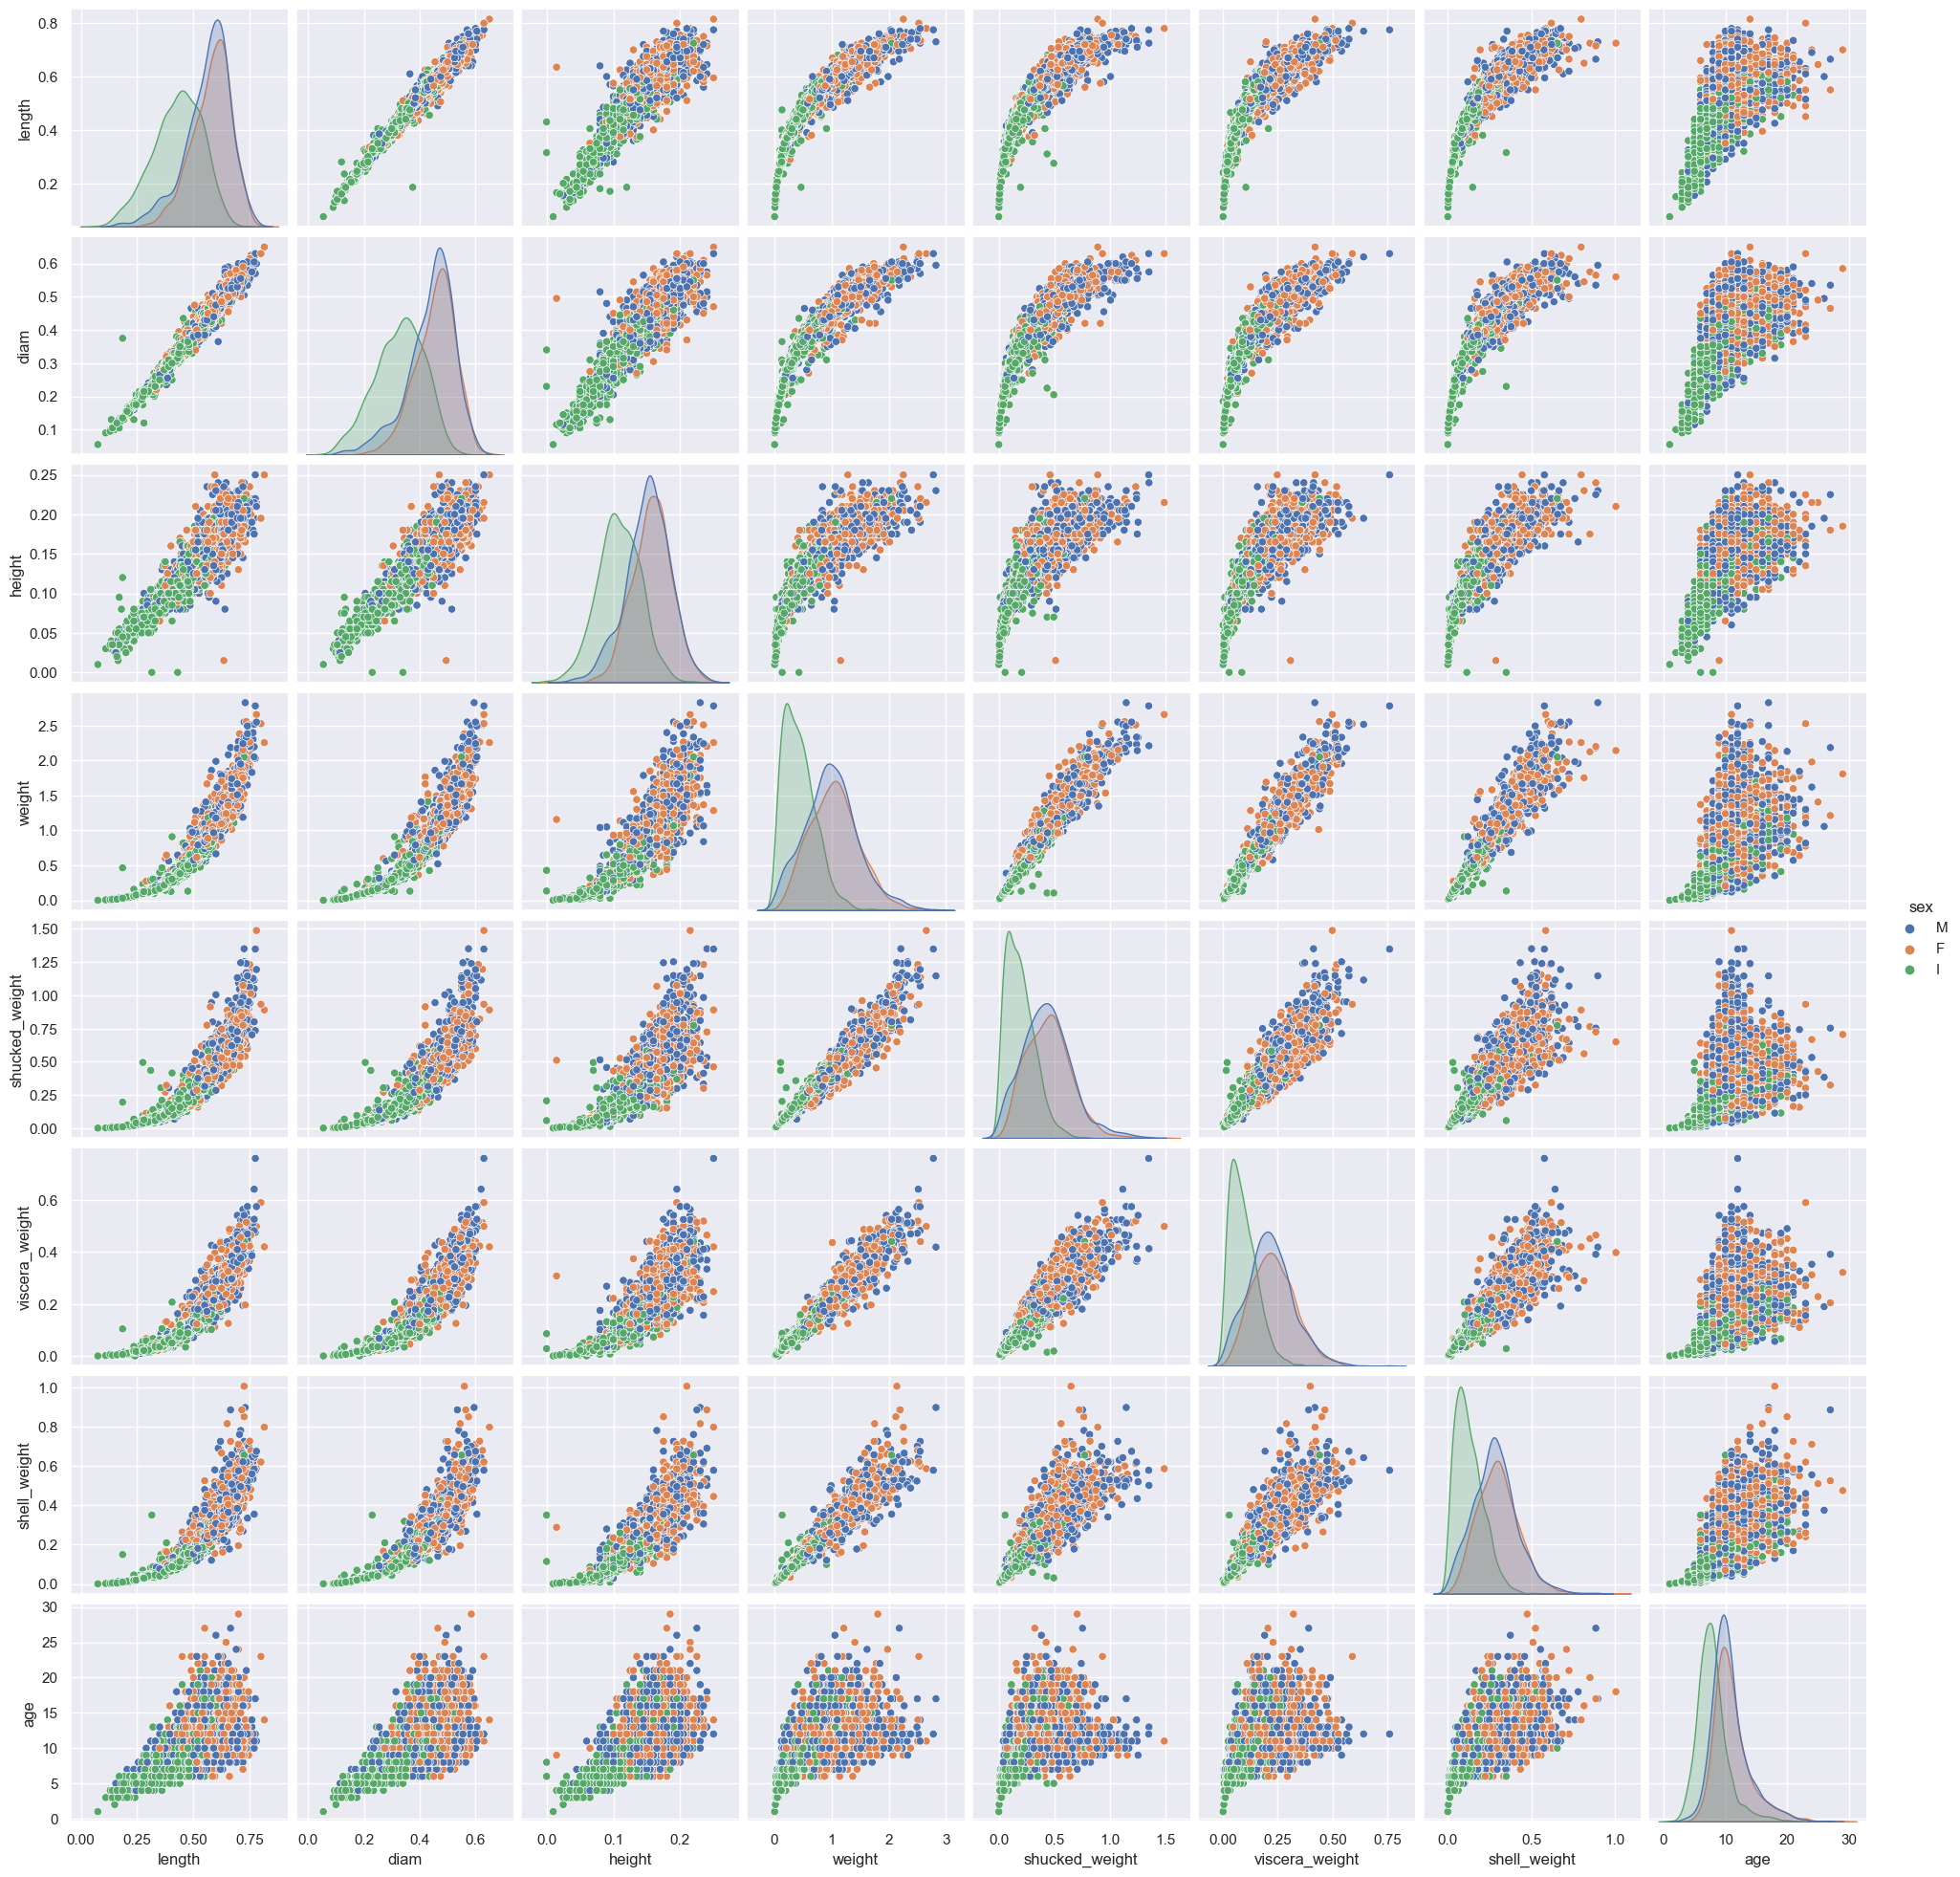

In [8]:
_ = sns.pairplot(df, hue="sex")

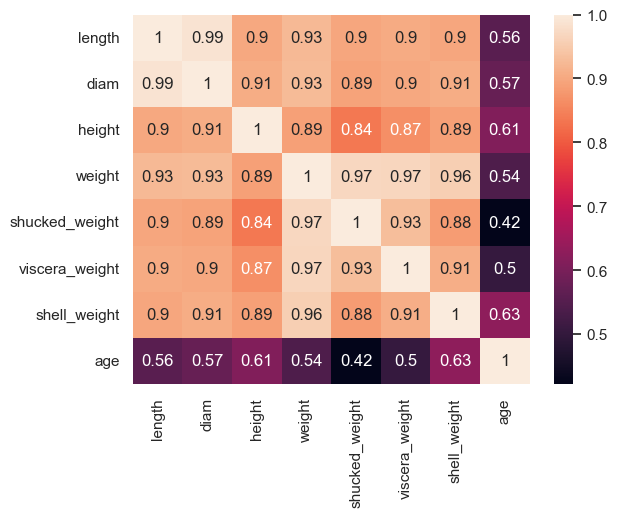

In [9]:
df2 = df.drop(['sex'], axis=1)
sns.heatmap(df2.corr(), annot=True);

# Preprocessing

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['sex'])
tf = le.transform(df['sex'])
df['sex'] = tf
df.head()

,sex,length,diam,height,weight,shucked_weight,viscera_weight,shell_weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
array = df.values
X = array[:,:8]
y = array[:,8]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3, shuffle=True, random_state=123)

# Regression Algorithms

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

models = []
models.append(('DT', DecisionTreeRegressor()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('LAS', Lasso()))
models.append(('LIN', LinearRegression()))
models.append(('RID', Ridge()))
models.append(('SVR', SVR(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

DT: -8.596001 (0.639019)
EN: -9.669113 (0.920178)
KNN: -4.958536 (0.834058)
LAS: -10.472012 (1.114272)
LIN: -4.903081 (0.659392)
RID: -4.943490 (0.661087)
SVR: -6.096966 (1.021921)


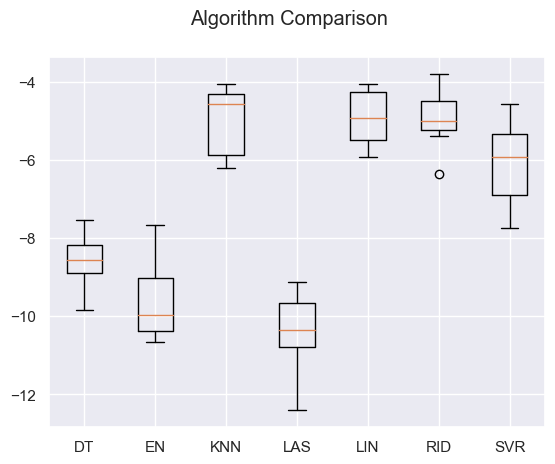

In [14]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Ensemble Algorithms

In [15]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor

num_folds = 10
seed = 123
scoring = 'accuracy'

ensembles = []
ensembles.append(('AB', AdaBoostRegressor()))
ensembles.append(('GBM', GradientBoostingRegressor()))
ensembles.append(('RF', RandomForestRegressor(n_estimators=10)))
ensembles.append(('ET', ExtraTreesRegressor(n_estimators=10)))
ensembles.append(('BG', BaggingRegressor()))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: -8.007139 (0.797714)
GBM: -4.700535 (0.634383)
RF: -5.015758 (0.634031)
ET: -5.086782 (0.649100)
BG: -5.108849 (0.677510)


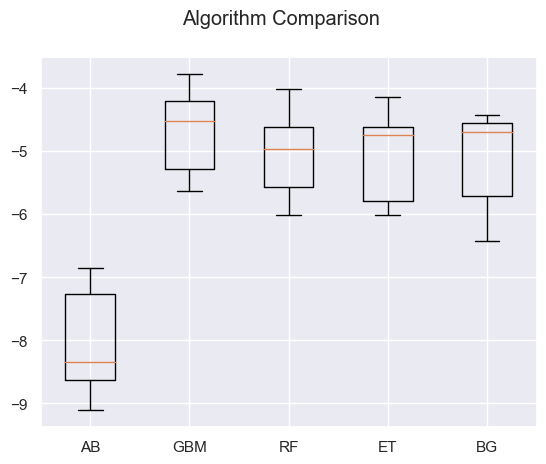

In [16]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
tuning_df = pd.DataFrame(columns = ('Model', 'Score', 'Param1', 'Param1_Val', 'Param2', 'Param2_Val', 'Param3', 'Param3_Val',  
                                   'Param4', 'Param4_Val'))

def append_results_df(model, score, param1, param1_val, param2, param2_val, param3, param3_val, param4, param4_val):
    new_row = len(tuning_df) + 1
    tuning_df.loc[new_row,'Model'] = model
    tuning_df.loc[new_row,'Score'] = score
    tuning_df.loc[new_row,'Param1'] = param1
    tuning_df.loc[new_row,'Param1_Val'] = param1_val
    tuning_df.loc[new_row,'Param2'] = param2
    tuning_df.loc[new_row,'Param2_Val'] = param2_val
    tuning_df.loc[new_row,'Param3'] = param3
    tuning_df.loc[new_row,'Param3_Val'] = param3_val
    tuning_df.loc[new_row,'Param4'] = param4
    tuning_df.loc[new_row,'Param4_Val'] = param4_val 

### KNN

In [19]:
neighbors = np.array([12,13,14,15,16])
p = np.array([1,2])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
param_grid = dict(n_neighbors=neighbors, p=p, algorithm=algorithm)
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=30, scoring='neg_mean_squared_error')

In [20]:
grid.fit(X_train, y_train)

model = "KNN"
score = round(grid.best_score_,3)
param1 = "n_neighbors"
param1_val = grid.best_estimator_.n_neighbors
param2 = "p"
param2_val = grid.best_estimator_.p
param3 = "algorithm"
param3_val = grid.best_estimator_.algorithm
param4 = ""
param4_val = ""

append_results_df(model,score,param1,param1_val,param2,param2_val,param3,param3_val,param4,param4_val)

In [21]:
tuning_df

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
1,KNN,-4.85,n_neighbors,14,p,2,algorithm,auto,,


### Ridge Regression

In [22]:
alphas = np.array([100,10,1,0.1,0.01,0.001])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=30, scoring='neg_mean_squared_error')

In [23]:
grid.fit(X_train, y_train)

model = "Ridge"
score = round(grid.best_score_,3)
param1 = "alpha"
param1_val = grid.best_estimator_.alpha
param2 = ""
param2_val = ""
param3 = ""
param3_val = ""
param4 = ""
param4_val = ""

append_results_df(model,score,param1,param1_val,param2,param2_val,param3,param3_val,param4,param4_val)

In [24]:
tuning_df

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
1,KNN,-4.85,n_neighbors,14,p,2,algorithm,auto,,
2,Ridge,-4.881,alpha,0.01,,,,,,


### Gradient Boosting Machine

In [25]:
LRs = np.array([0.1,0.01,0.001,0])
n_est = np.array([80,90,100,110,120])
param_grid = dict(learning_rate=LRs, n_estimators=n_est)
model = GradientBoostingRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')

In [26]:
grid.fit(X_train, y_train)

model = "GBM"
score = round(grid.best_score_,3)
param1 = "learning_rate"
param1_val = grid.best_estimator_.learning_rate
param2 = "n_estimators"
param2_val = grid.best_estimator_.n_estimators
param3 = ""
param3_val = ""
param4 = ""
param4_val = ""

append_results_df(model,score,param1,param1_val,param2,param2_val,param3,param3_val,param4,param4_val)

In [27]:
tuning_df

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
1,KNN,-4.85,n_neighbors,14,p,2,algorithm,auto,,
2,Ridge,-4.881,alpha,0.01,,,,,,
3,GBM,-4.706,learning_rate,0.1,n_estimators,110,,,,


# Performance Upon Test Set

In [28]:
KNN = tuning_df[tuning_df['Model'] == 'KNN']
KNN

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
1,KNN,-4.85,n_neighbors,14,p,2,algorithm,auto,,


In [29]:
KNN_n_neighbors = KNN['Param1_Val'][1]
KNN_p = KNN['Param2_Val'][1]
KNN_algorithm = KNN['Param3_Val'][1]

In [30]:
Ridge_df = tuning_df[tuning_df['Model'] == 'Ridge']
Ridge_df

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
2,Ridge,-4.881,alpha,0.01,,,,,,


In [31]:
Ridge_alpha = Ridge_df['Param1_Val'][2]

In [32]:
GBM = tuning_df[tuning_df['Model'] == 'GBM']
GBM

,Model,Score,Param1,Param1_Val,Param2,Param2_Val,Param3,Param3_Val,Param4,Param4_Val
3,GBM,-4.706,learning_rate,0.1,n_estimators,110,,,,


In [33]:
GBM_learning_rate = GBM['Param1_Val'][3]
GBM_n_estimators = GBM['Param2_Val'][3]

In [34]:
from sklearn.metrics import mean_squared_error

models = []
models.append(('KNN', KNeighborsRegressor(n_neighbors=KNN_n_neighbors,
                                          p=KNN_p, 
                                          algorithm=KNN_algorithm)))
models.append(('LIN', LinearRegression()))
models.append(('RID', Ridge(alpha=Ridge_alpha)))
models.append(('GBM', GradientBoostingRegressor(learning_rate=GBM_learning_rate,n_estimators=GBM_n_estimators)))

In [35]:
print("Mean Squared Error, Test Set:")

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    names.append(name)
    print(name, round(mean_squared_error(y_test, predictions),3))

Mean Squared Error, Test Set:
KNN 4.91
LIN 4.86
RID 4.862
GBM 4.895
